# Camadas Convolucional

Antes de mais nada, vamos fazer os imports.

In [2]:
import torch
from torch import nn #neural networks

from skimage import data

import matplotlib.pyplot as plt

## Convolucional

Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d

Começando pela operação principal, a convolução está contida na camada ```nn.Conv2d```. Dentre os parâmetros que ela recebe, vamos focar nos que já conhecemos, que já são suficientes para uma diversa gama de aplicações. 

```python
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

**```in_channels```**<br>
Assim como toda camada, seu primeiro parâmetro é referente ao **tamanho da entrada**. Não é necessário explicitar as 2 primeiras dimensões da entrada, apenas a profundidade, que corresponde à **quantidade de canais**.

**```out_channels```** <br>
Independentemente do número de canais de entrada, um único filtro convolucional terá como resultado um canal de saída. Alterando esse parâmetro estamos na verdade definindo o **número de filtros** que irão compor essa camada, interferindo na quantidade de neurônios dessa camada.

> Dica: Nas arquiteturas de redes neurais mais populares, aumentamos a dimensão do canal à medida que avançamos na rede neural, geralmente diminuindo a resolução.

**```kernel_size```** <br>
Tamanho dos filtros convolucionais. Pode ser uma tupla ou um único número. Ex: ```kernel_size = 3``` criará filtros $3 \times 3$

**```stride```** <br>
Controla o pulo da convolução ao longo da imagem. 

**```padding```** <br>
Preenchimento com zeros nas bordas da imagem.

Vamos brincar um pouco com a camada convolucional para entender o seu funcionamento. Para isso, considere duas amostras de entrada retiradas do módulo ```skimage```:
* [brick](https://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.brick) : Imagem preta e branca de uma parede de tijolos
* [astronaut](https://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.astronaut) : Imagem colorida da astronauta Eileen Collins

(512, 512) (512, 512, 3)


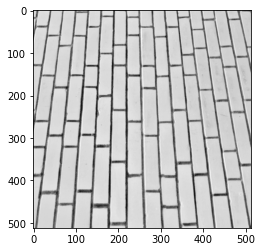

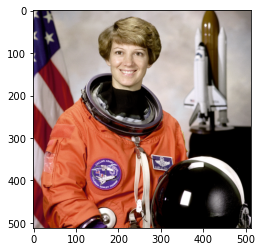

In [3]:
pb = data.brick()
rgb = data.astronaut()

print(pb.shape, rgb.shape)

plt.imshow(pb, cmap='Greys')
plt.figure()
plt.imshow(rgb)

Na célula a seguir vamos definir uma camada convolucional para realizar o forward na figura *brick*. Para isso, preste atenção em alguns detalhes:

* A entrada deve ser um dado tipo Tensor.
* A camada Convolucional espera uma entrada com as seguintes dimensões:
 $B \times C \times H \times W$

In [4]:
conv = nn.Conv2d(in_channels=1, out_channels=16, 
                 kernel_size=3)

print(conv)

## convertendo a imagem em tensor
pb_tns = torch.Tensor(pb)
pb_tns = pb_tns.view(1,1, pb_tns.size(0), pb_tns.size(1))  # 𝐵×𝐶×𝐻×𝑊
print(pb_tns.size())

mapa_de_ativacao = conv(pb_tns)
print(mapa_de_ativacao.size()) # 1, 16, 510, 510

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
torch.Size([1, 1, 512, 512])
torch.Size([1, 16, 510, 510])


Agora vamos fazer o mesmo para a figura da astronauta. O que deve mudar em relação à célula anterior?

* Em PyTorch a dimensão dos canais deve vir primeiro
* A definição da camada deve comportar uma entrada com 3 canais.

In [6]:
conv = nn.Conv2d(in_channels=3, out_channels=16, 
                 kernel_size=5, padding=2)

print(conv)

#passando a imagem colorida e fazendo a permutua
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0)
print(rgb_tns.size())

mapa_de_ativacao = conv(rgb_tns)
print(mapa_de_ativacao.size()) # 1, 16, 510, 510

Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
torch.Size([1, 3, 512, 512])
torch.Size([1, 16, 512, 512])
